In [15]:
import pandas as pd

# Load the uploaded files
test_data = pd.read_csv('../data/test.csv')
train_data = pd.read_csv('../data/train.csv')

# Calculate MAD for train and test datasets
train_mad = (train_data['value'] - train_data['predicted']).abs().mean()
test_mad = (test_data['value'] - test_data['predicted']).abs().mean()

# Print the results
print("Mean Absolute Deviation for Train Dataset:", train_mad)
print("Mean Absolute Deviation for Test Dataset:", test_mad)


Mean Absolute Deviation for Train Dataset: 48.216031164420095
Mean Absolute Deviation for Test Dataset: 2.9758615010066665


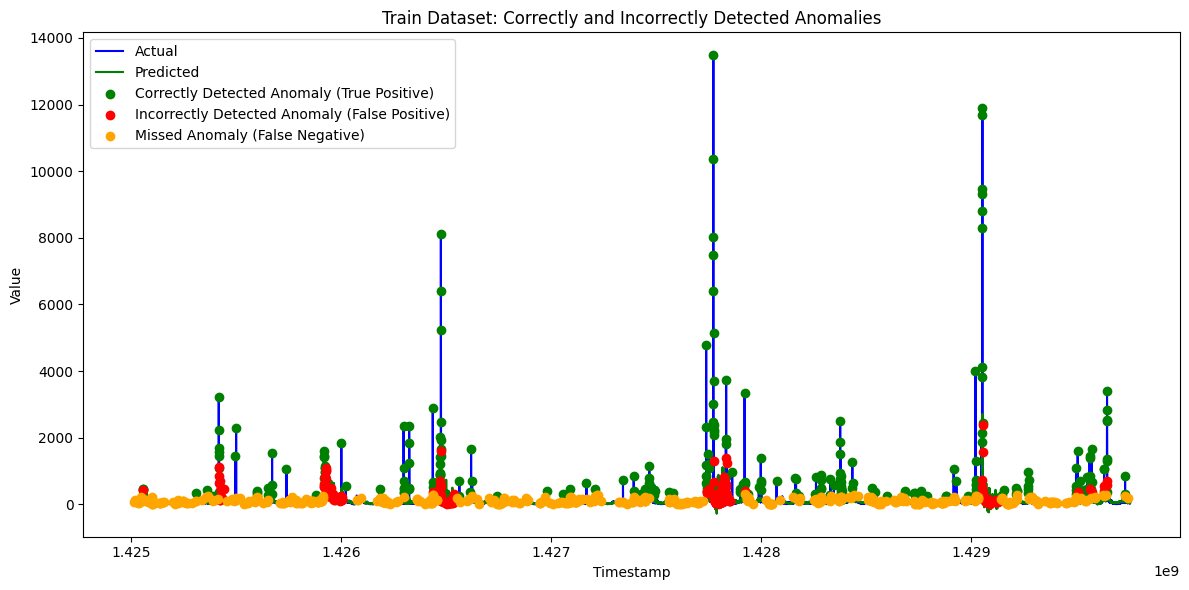

True Positives (Correctly Detected Anomalies): 269
False Positives (Incorrectly Detected Anomalies): 307
False Negatives (Missed Anomalies): 507


In [21]:
# Define True Positives (Correctly Detected), False Positives, and False Negatives
train_data['true_positive'] = (train_data['is_anomaly'] == True) & (train_data['detected_anomaly'] == True)
train_data['false_positive'] = (train_data['is_anomaly'] == False) & (train_data['detected_anomaly'] == True)
train_data['false_negative'] = (train_data['is_anomaly'] == True) & (train_data['detected_anomaly'] == False)

# Subsets for plotting
true_positives = train_data[train_data['true_positive'] == True]
false_positives = train_data[train_data['false_positive'] == True]
false_negatives = train_data[train_data['false_negative'] == True]

# Plot the visualization with correctly and incorrectly detected anomalies
plt.figure(figsize=(12, 6))

# Plot actual and predicted values
plt.plot(train_data['timestamp'], train_data['value'], label='Actual', color='blue')
plt.plot(train_data['timestamp'], train_data['predicted'], label='Predicted', color='green')

# Highlight true positives (correctly detected anomalies) in green
plt.scatter(true_positives['timestamp'], true_positives['value'], color='green', label='Correctly Detected Anomaly (True Positive)', zorder=3)

# Highlight false positives in red
plt.scatter(false_positives['timestamp'], false_positives['value'], color='red', label='Incorrectly Detected Anomaly (False Positive)', zorder=3)

# Highlight false negatives in orange
plt.scatter(false_negatives['timestamp'], false_negatives['value'], color='orange', label='Missed Anomaly (False Negative)', zorder=3)

# Plot details
plt.title('Train Dataset: Correctly and Incorrectly Detected Anomalies')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


# Count the number of true positives, false positives, and false negatives
true_positive_count = true_positives.shape[0]
false_positive_count = false_positives.shape[0]
false_negative_count = false_negatives.shape[0]

# Print the counts
print("True Positives (Correctly Detected Anomalies):", true_positive_count)
print("False Positives (Incorrectly Detected Anomalies):", false_positive_count)
print("False Negatives (Missed Anomalies):", false_negative_count)